In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
f = r"C:\Users\anukr\Downloads\stockprice.csv"
stock_df = pd.read_csv(f)


In [10]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


######setting the date as index. 

In [11]:
stock_df.set_index('Date', inplace=True)

In [12]:
stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


Text(0.5, 1.0, 'Stock Plot for Overall Period')

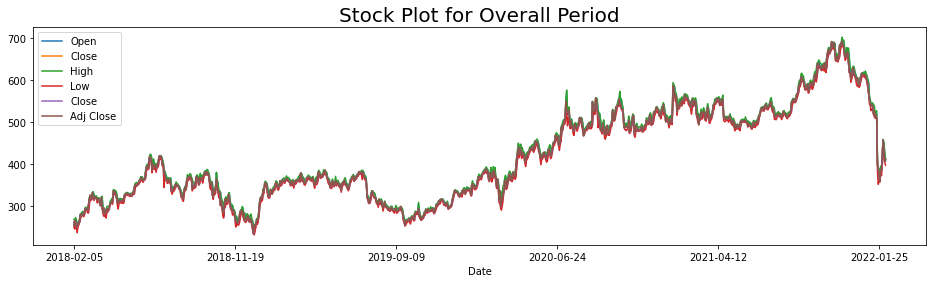

In [14]:
stock_df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(16,4))
plt.title("Stock Plot for Overall Period", fontsize=20)

#### Dates when the stock price was highest (top 10)

In [15]:
topten_highprice_df = stock_df.sort_values(by='High',ascending= False).head(5)
topten_highprice_df['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

#### Dates when the stock price was lowest (top 10)

In [16]:
topten_lowprice_df = stock_df.sort_values(by='Low',ascending= True).head(5)
topten_lowprice_df['Low']

Date
2018-12-26    231.229996
2018-12-24    233.679993
2018-02-09    236.110001
2018-12-27    240.100006
2018-12-21    241.289993
Name: Low, dtype: float64

##### Plotting the higher and lower values with the period of time. 

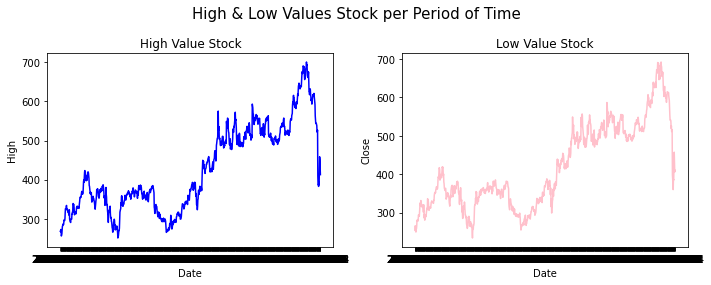

In [21]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(10,4))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=15)
sns.lineplot(ax= axes[0], y=stock_df['High'],x=stock_df.index, color='blue')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=stock_df['Close'], x=stock_df.index, color='pink')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

##### Date that had best stock price and the worst stock price

###### to calculate the daily returns, calculating the percentage change between current and prior adj_close values. adding the daily return column in the data frame 


In [22]:
stock_df['Daily_returns'] = stock_df['Adj Close'].pct_change()
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.004366
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.054657
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.002519


In [25]:
#the best day 
stock_df[stock_df['Daily_returns'] == stock_df['Daily_returns'].max()]['Daily_returns']

Date
2021-01-20    0.168543
Name: Daily_returns, dtype: float64

In [26]:
#worst day
#the best day 
stock_df[stock_df['Daily_returns'] == stock_df['Daily_returns'].min()]['Daily_returns']

Date
2022-01-21   -0.217905
Name: Daily_returns, dtype: float64

##### plotting Daily returns

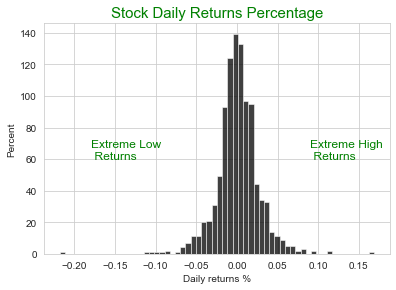

In [32]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= stock_df['Daily_returns'], bins=60, color='black')
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Stock Daily Returns Percentage",fontsize= 15, color='green' )
ax1.text(-0.18,60,"Extreme Low\n Returns",fontsize= 12, color='green')
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12, color='green')
plt.show()

## Prediction of the stock prices using linear regression and random forest. 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

### the data set is divided into training and testing data sets. 

In [36]:
X = stock_df[['Open', 'High', 'Low', 'Close', 'Volume']]
Y = stock_df['Adj Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=0)

#####scaling the data sets

In [38]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

applying the model on the data

In [41]:
model = RandomForestRegressor(n_estimators = 500, random_state= 42, max_depth=10)
model.fit(X_train, Y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[554.0630585  379.25218011 361.34714481 282.29703886 261.00653289
 434.17522113 264.80147703 517.98147337 315.71724591 348.74194061
 520.23679709 321.46808045 489.86584607 298.44706997 510.63594785
 503.10247838 288.72776402 549.64424464 337.52681409 270.1237949
 338.59304886 294.14163823 462.60920668 369.06206316 290.24344824
 502.97063329 498.41887853 297.26819118 351.24835337 363.63332502
 280.5274096  542.67761312 316.9173498  540.61543909 303.77068083
 519.98303669 339.63852072 381.24298671 515.74387577 628.87437691
 482.32873761 298.27252864 305.74164444 264.83264422 515.91437598
 297.38360648 294.21768618 384.24395681 359.66885008 419.29162813
 365.86655396 606.62097883 480.66725609 512.50871504 364.61525456
 419.20395767 375.42191495 360.27310936 370.31658412 361.07826663
 294.908312   493.15867413 491.90491407 406.18781554 325.21246345
 508.13063565 504.38389982 354.88288132 321.14513736 344.5391295
 656.57128001 351.38266548 263.21572003 267.81493931 427.07736154
 548.0031942

### with this now we can take predict with data of a week or month or an year. 

In [47]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=stock_df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

#collecting future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:7])
fivedays_df.to_csv("a_week-predictions.csv")

In [44]:
predictions

,Predictions
2022-02-04,554.063058
2022-02-05,379.252180
2022-02-06,361.347145
2022-02-07,282.297039
2022-02-08,261.006533
...,...
2022-10-10,425.739896
2022-10-11,272.003295
2022-10-12,546.714107
2022-10-13,366.652648


#### one year prediction

Buy Date and Price of Stock
     Unnamed: 0  Predictions
199  2022-08-22   257.089532 

Sell Date and Price of stock
     Unnamed: 0  Predictions
170  2022-07-24   687.026797


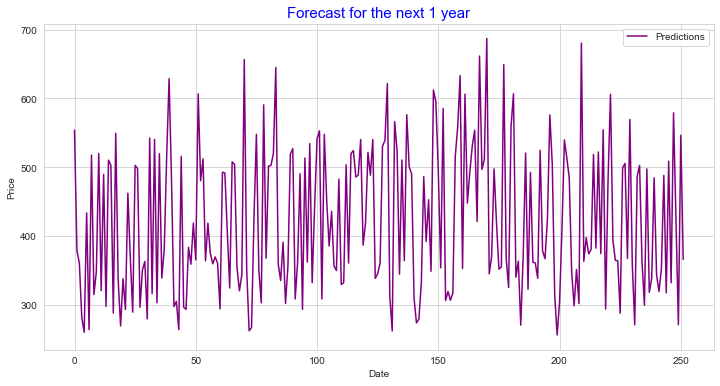

In [46]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy Date and Price of Stock")
print(oneyear_buy,'\n')
print("Sell Date and Price of stock")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(12, 6), color="purple")
plt.title("Forecast for the next 1 year", size=15, color='blue')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### for a week

Buy price and date
   Unnamed: 0  Predictions
4  2022-02-08   261.006533 

Sell price and date
   Unnamed: 0  Predictions
0  2022-02-04   554.063058


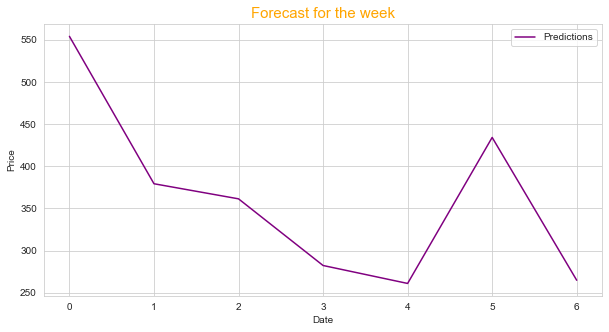

In [49]:
week_df_pred = pd.read_csv("a_week-predictions.csv")
buy_price = min(week_df_pred["Predictions"])
sell_price = max(week_df_pred["Predictions"])
week_buy = week_df_pred.loc[week_df_pred["Predictions"] == buy_price]
week_sell = week_df_pred.loc[week_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(week_buy,'\n')
print("Sell price and date")
print(week_sell)
week_df_pred["Predictions"].plot(figsize=(10, 5), color="purple")
plt.title("Forecast for the week",size=15, color='orange')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Inference 

The data given had opening stock prices, the higher and lower price for each date and the closing prices. 
with the help of the given data the data was predicted with the 25 and 75 division of training and testing data sets. 
the data is plotted and presented. 